In [1]:
# Z_test VS t_Test

In [21]:
import numpy as np
import math
from scipy import stats

# Sample data
a = np.random.randint(0, 100, size=1000)
sample = np.random.choice(a, size=9)
n = len(sample)
sample_mean = sample.mean()
hypothesized_mean = a.mean()
sigma = a.std(ddof=1)  # Population std deviation (for Z-test)
sample_std = sample.std(ddof=1)  # Sample std deviation (for T-test)

# Z-test: Population std deviation is known
z_score = (sample_mean - hypothesized_mean) / (sigma / math.sqrt(n))

# T-test: Population std deviation is unknown, use sample std
t_score = (sample_mean - hypothesized_mean) / (sample_std / math.sqrt(n))

# Critical value for 95% confidence level (two-tailed)
z_critical = 1.96  # Z-critical value for 95% confidence
t_critical = stats.t.ppf(1 - 0.025, df=n - 1)  # T-critical value for 95% confidence, two-tailed

# Resulting hypothesis test decision
z_test_result = "Reject H₀" if abs(z_score) > z_critical else "Fail to Reject H₀"
t_test_result = "Reject H₀" if abs(t_score) > t_critical else "Fail to Reject H₀"

print(f"Z-score: {z_score:.3f}")
print(f"T-score: {t_score:.3f}")
print(f"Z-test result: {z_test_result}")
print(f"T-test result: {t_test_result}")

Z-score: -1.103
T-score: -1.296
Z-test result: Fail to Reject H₀
T-test result: Fail to Reject H₀


In [26]:
import math

# Approximate the error function using numerical integration (Trapezoidal rule)
def erf(x, n=1000):
    # Step size for the integration
    h = x / n
    sum_result = 0
    
    # Numerical integration using the trapezoidal rule
    for i in range(1, n+1):
        t = i * h
        sum_result += math.exp(-t**2) * h
    
    return (2 / math.sqrt(math.pi)) * sum_result

# Example usage
x = 1.0
erf_value = erf(x)
print(f"erf({x}) = {erf_value}")

erf(1.0) = 0.8423440879302919


In [27]:
import math
from scipy import special

# Define the CDF of the normal distribution
def normal_cdf(x, mu=0, sigma=1):
    return 0.5 * (1 + erf((x - mu) / (sigma * math.sqrt(2))))

# Define the PPF using the Bisection method
def normal_ppf(p, mu=0, sigma=1, tol=1e-6, max_iter=100000000000):
    # Bisection method: we assume the solution lies between -10*sigma and +10*sigma
    a, b = mu - 10*sigma, mu + 10*sigma
    iter_count = 0
    
    while iter_count < max_iter:
        c = (a + b) / 2
        cdf_c = normal_cdf(c, mu, sigma)
        
        # Check if the middle value is close enough to the desired probability
        if abs(cdf_c - p) < tol:
            return c
        
        # Narrow the interval based on where the CDF is in relation to p
        if cdf_c < p:
            a = c  # CDF at c is less than p, so move a to c
        else:
            b = c  # CDF at c is greater than p, so move b to c
        
        iter_count += 1
    
    # Return the best approximation found
    return (a + b) / 2

# Example usage: Find the 95% quantile (ppf for p=0.975) for a normal distribution
p = 0.975
mu = 0  # Mean of normal distribution
sigma = 1  # Standard deviation of normal distribution

ppf_value = normal_ppf(p, mu, sigma)
print(f"PPF for p={p}: {ppf_value}")

PPF for p=0.975: 1.9657516479492188


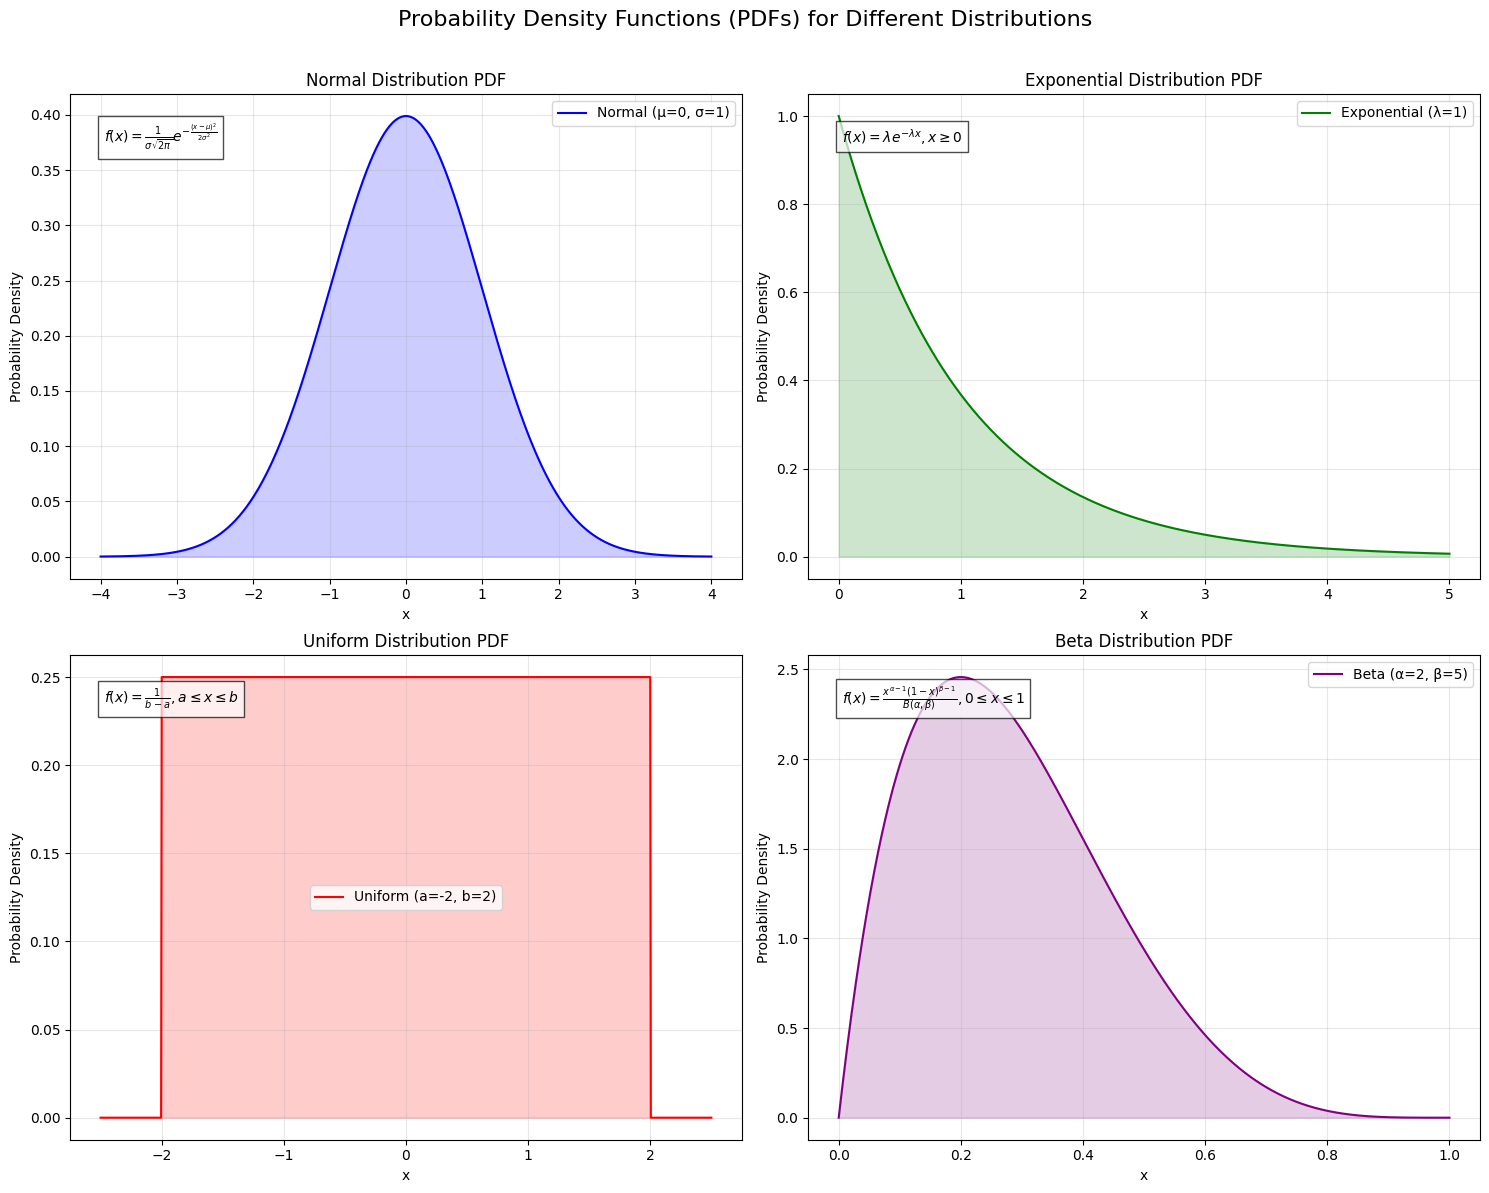

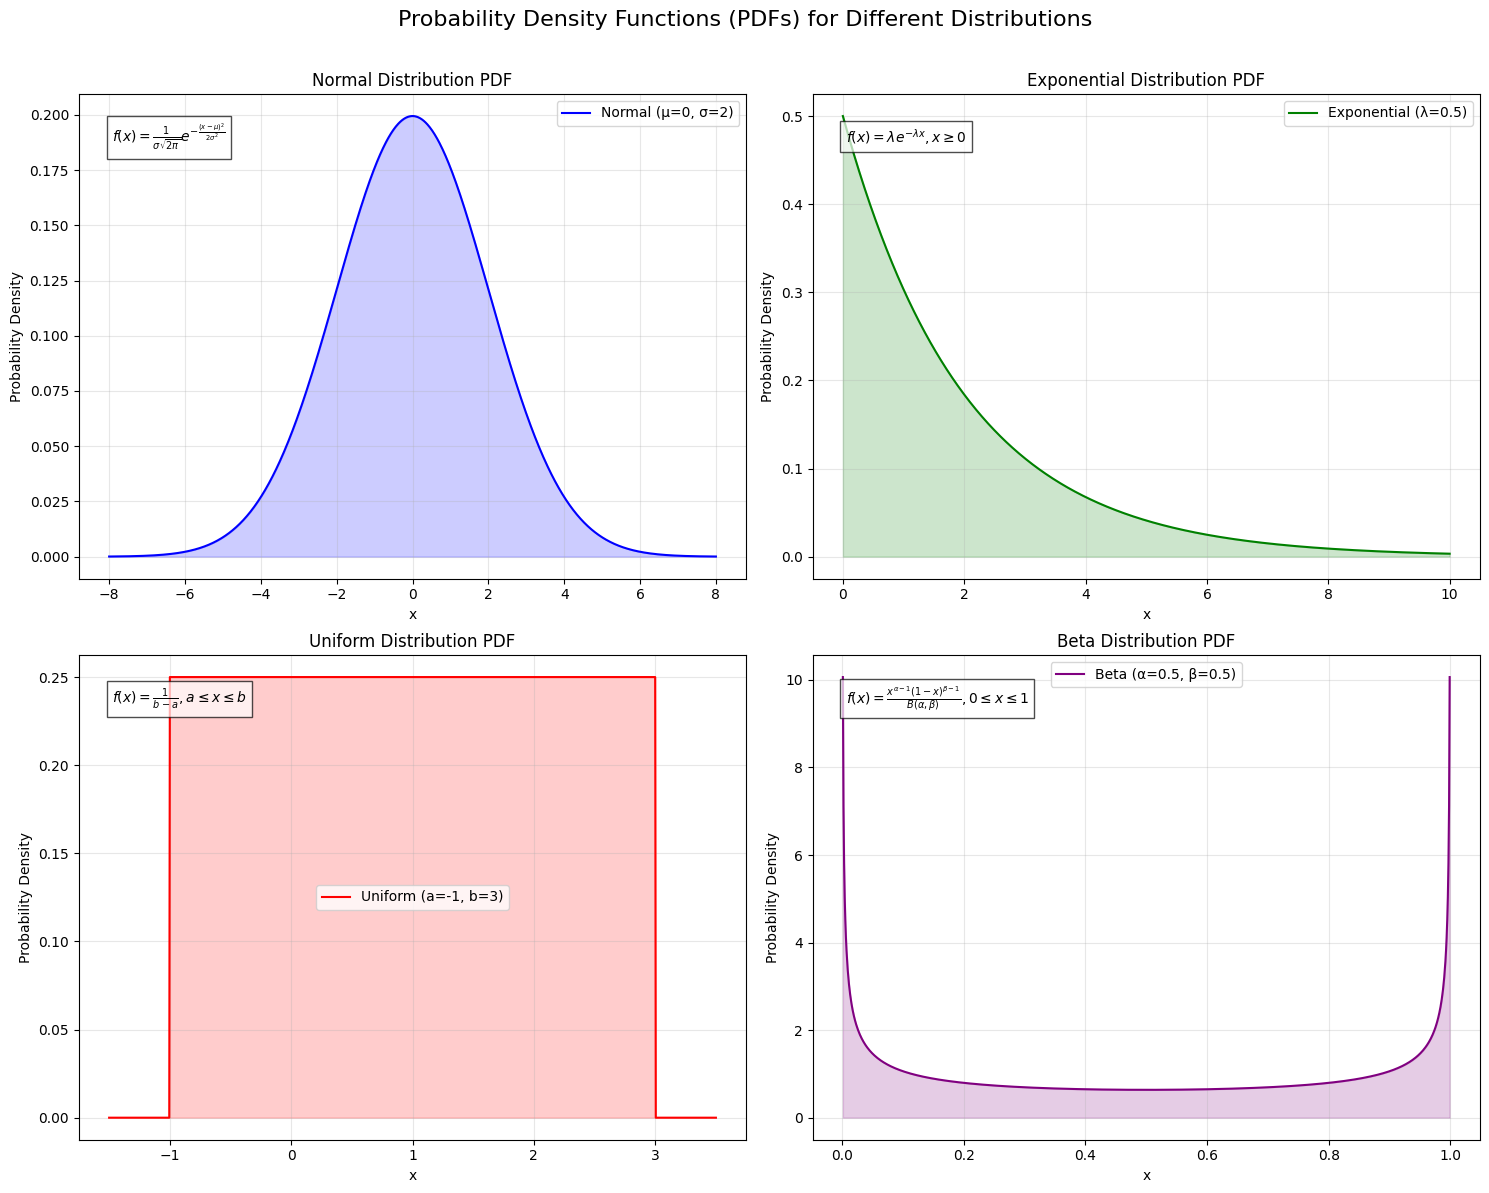

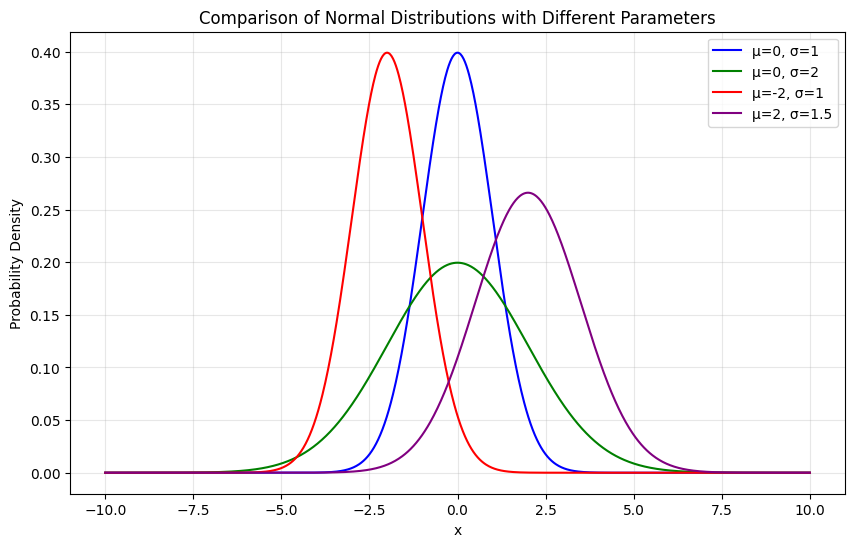

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec

def plot_normal_pdf(ax, mean=0, std=1, color='blue'):
    """Plot normal distribution PDF"""
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    y = stats.norm.pdf(x, mean, std)
    ax.plot(x, y, color=color, label=f'Normal (μ={mean}, σ={std})')
    ax.fill_between(x, y, alpha=0.2, color=color)
    ax.set_title('Normal Distribution PDF')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Display formula
    formula = r'$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$'
    ax.text(0.05, 0.9, formula, transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

def plot_exponential_pdf(ax, lambda_param=1, color='green'):
    """Plot exponential distribution PDF"""
    x = np.linspace(0, 5/lambda_param, 1000)
    y = stats.expon.pdf(x, scale=1/lambda_param)
    ax.plot(x, y, color=color, label=f'Exponential (λ={lambda_param})')
    ax.fill_between(x, y, alpha=0.2, color=color)
    ax.set_title('Exponential Distribution PDF')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Display formula
    formula = r'$f(x) = \lambda e^{-\lambda x}, x \geq 0$'
    ax.text(0.05, 0.9, formula, transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

def plot_uniform_pdf(ax, a=-1, b=1, color='red'):
    """Plot uniform distribution PDF"""
    x = np.linspace(a-0.5, b+0.5, 1000)
    y = np.zeros_like(x)
    mask = (x >= a) & (x <= b)
    y[mask] = 1/(b-a)
    ax.plot(x, y, color=color, label=f'Uniform (a={a}, b={b})')
    ax.fill_between(x, y, alpha=0.2, color=color)
    ax.set_title('Uniform Distribution PDF')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Display formula
    formula = r'$f(x) = \frac{1}{b-a}, a \leq x \leq b$'
    ax.text(0.05, 0.9, formula, transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

def plot_beta_pdf(ax, alpha=2, beta=5, color='purple'):
    """Plot beta distribution PDF"""
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, alpha, beta)
    ax.plot(x, y, color=color, label=f'Beta (α={alpha}, β={beta})')
    ax.fill_between(x, y, alpha=0.2, color=color)
    ax.set_title('Beta Distribution PDF')
    ax.set_xlabel('x')
    ax.set_ylabel('Probability Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Display formula
    formula = r'$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}, 0 \leq x \leq 1$'
    ax.text(0.05, 0.9, formula, transform=ax.transAxes, fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7))

def create_pdf_comparison(params=None):
    """Create a figure with multiple PDF plots"""
    if params is None:
        params = {
            'normal': {'mean': 0, 'std': 1},
            'exponential': {'lambda_param': 1},
            'uniform': {'a': -2, 'b': 2},
            'beta': {'alpha': 2, 'beta': 5}
        }
    
    fig = plt.figure(figsize=(15, 12))
    gs = gridspec.GridSpec(2, 2, figure=fig)
    
    # Normal distribution
    ax1 = fig.add_subplot(gs[0, 0])
    plot_normal_pdf(ax1, **params['normal'])
    
    # Exponential distribution
    ax2 = fig.add_subplot(gs[0, 1])
    plot_exponential_pdf(ax2, **params['exponential'])
    
    # Uniform distribution
    ax3 = fig.add_subplot(gs[1, 0])
    plot_uniform_pdf(ax3, **params['uniform'])
    
    # Beta distribution
    ax4 = fig.add_subplot(gs[1, 1])
    plot_beta_pdf(ax4, **params['beta'])
    
    plt.tight_layout()
    plt.suptitle('Probability Density Functions (PDFs) for Different Distributions', 
                 fontsize=16, y=0.99)
    plt.subplots_adjust(top=0.92)
    return fig

# Example usage
if __name__ == "__main__":
    # Example 1: Default parameters
    fig1 = create_pdf_comparison()
    plt.savefig('pdf_distributions_default.png', dpi=300)
    
    # Example 2: Custom parameters
    custom_params = {
        'normal': {'mean': 0, 'std': 2},
        'exponential': {'lambda_param': 0.5},
        'uniform': {'a': -1, 'b': 3},
        'beta': {'alpha': 0.5, 'beta': 0.5}
    }
    fig2 = create_pdf_comparison(custom_params)
    plt.savefig('pdf_distributions_custom.png', dpi=300)
    
    # Example 3: Plot multiple normal distributions with different parameters
    plt.figure(figsize=(10, 6))
    x = np.linspace(-10, 10, 1000)
    
    # Plot multiple normal distributions with different parameters
    parameters = [
        {'mean': 0, 'std': 1, 'color': 'blue', 'label': 'μ=0, σ=1'},
        {'mean': 0, 'std': 2, 'color': 'green', 'label': 'μ=0, σ=2'},
        {'mean': -2, 'std': 1, 'color': 'red', 'label': 'μ=-2, σ=1'},
        {'mean': 2, 'std': 1.5, 'color': 'purple', 'label': 'μ=2, σ=1.5'}
    ]
    
    for params in parameters:
        plt.plot(x, stats.norm.pdf(x, params['mean'], params['std']), 
                 color=params['color'], label=params['label'])
    
    plt.title('Comparison of Normal Distributions with Different Parameters')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('normal_distribution_comparison.png', dpi=300)
    
    plt.show()